In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

class NeuralNetwork:
    def __init__(self, layers, learning_rate, momentum_factor, epochs, batch_size):
        self.layers = layers
        self.num_layers = len(layers)
        self.learning_rate = learning_rate
        self.momentum_factor = momentum_factor
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = [np.random.randn(layers[i-1], layers[i]) for i in range(1, self.num_layers)]
        self.old_weights = [np.zeros((layers[i-1], layers[i])) for i in range(1, self.num_layers)]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=-1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

    def compute_loss(self, y_pred, y_true):
        # Compute categorical cross-entropy loss
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    def forward_propagation(self, x):
        activations = [x]
        zs = []

        for w in self.weights:
            z = np.dot(activations[-1], w)
            zs.append(z)
            activations.append(self.sigmoid(z))

        return activations, zs

    def backward_propagation(self, x_batch, y_batch, activations, zs):
        deltas = [None] * self.num_layers
        gradients_w = [np.zeros(w.shape) for w in self.weights]

        # Calculate output layer error
        deltas[-1] = activations[-1] - y_batch

        # Backpropagation for hidden layers
        for l in range(self.num_layers - 2, 0, -1):
            deltas[l] = np.dot(deltas[l+1], self.weights[l].T) * self.sigmoid_derivative(zs[l-1])

        # Compute gradients
        for l in range(self.num_layers - 1):
            gradients_w[l] = np.dot(activations[l].T, deltas[l+1])

        return gradients_w

    def train(self, X_train, y_train):
        highest_accuracy = 0
        num_batches = len(X_train) // self.batch_size

        for epoch in range(self.epochs):
            correct_predictions = 0
            total_loss = 0

            for batch_idx in range(num_batches):
                start_idx = batch_idx * self.batch_size
                end_idx = (batch_idx + 1) * self.batch_size
                x_batch = X_train[start_idx:end_idx]
                y_batch = y_train[start_idx:end_idx]

                activations, zs = self.forward_propagation(x_batch)
                gradients_w = self.backward_propagation(x_batch, y_batch, activations, zs)

                # Update weights
                for l in range(self.num_layers - 1):
                    self.weights[l] -= self.learning_rate * gradients_w[l]

                # Check predictions
                predictions = np.argmax(activations[-1], axis=1)
                true_labels = np.argmax(y_batch, axis=1)
                correct_predictions += np.sum(predictions == true_labels)

                # Compute loss
                loss = self.compute_loss(activations[-1], y_batch)
                total_loss += loss

            # Calculate accuracy and average loss
            accuracy = correct_predictions / len(X_train)
            average_loss = total_loss / num_batches

            print(f"Epoch {epoch+1}/{self.epochs}, Accuracy: {accuracy*100:.2f}%, Average Loss: {average_loss:.4f}")

            # Update highest_accuracy if current accuracy is higher
            if accuracy > highest_accuracy:
                highest_accuracy = accuracy

        print(f"Highest accuracy reached: {highest_accuracy * 100:.2f}%")
        
print("Setup done")

Setup done


In [2]:

# Load Fashion-MNIST data from openml
fashion_mnist = fetch_openml('Fashion-MNIST')
X = np.array(fashion_mnist.data, dtype=float) / 255.0
y = np.array(fashion_mnist.target, dtype=int)
y_one_hot = np.eye(10)[y]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.20, random_state=42)

# Define network architecture
layers = [784, 512, 10]
learning_rate = 0.01
momentum_factor = 0.9
epochs = 100
batch_size = 32

# Create neural network
nn = NeuralNetwork(layers, learning_rate, momentum_factor, epochs, batch_size)

# Train the network
nn.train(X_train, y_train)


Epoch 1/100, Accuracy: 76.85%, Average Loss: 1.3329
Epoch 2/100, Accuracy: 82.06%, Average Loss: 0.7891
Epoch 3/100, Accuracy: 83.75%, Average Loss: 0.6614
Epoch 4/100, Accuracy: 84.82%, Average Loss: 0.5937
Epoch 5/100, Accuracy: 85.81%, Average Loss: 0.5420
Epoch 6/100, Accuracy: 86.56%, Average Loss: 0.5045
Epoch 7/100, Accuracy: 87.20%, Average Loss: 0.4737
Epoch 8/100, Accuracy: 87.86%, Average Loss: 0.4462
Epoch 9/100, Accuracy: 88.35%, Average Loss: 0.4239
Epoch 10/100, Accuracy: 88.84%, Average Loss: 0.4041
Epoch 11/100, Accuracy: 89.30%, Average Loss: 0.3868
Epoch 12/100, Accuracy: 89.67%, Average Loss: 0.3708
Epoch 13/100, Accuracy: 90.06%, Average Loss: 0.3564
Epoch 14/100, Accuracy: 90.37%, Average Loss: 0.3430
Epoch 15/100, Accuracy: 90.69%, Average Loss: 0.3306
Epoch 16/100, Accuracy: 90.95%, Average Loss: 0.3190
Epoch 17/100, Accuracy: 91.31%, Average Loss: 0.3082
Epoch 18/100, Accuracy: 91.61%, Average Loss: 0.2979
Epoch 19/100, Accuracy: 91.92%, Average Loss: 0.2882
Ep

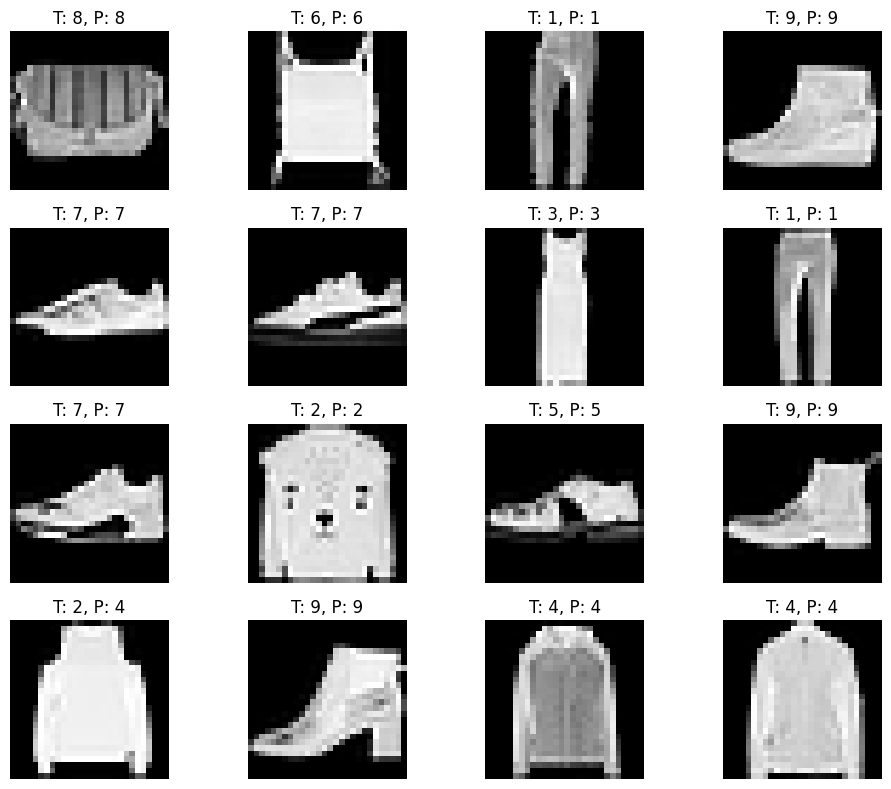

In [4]:
# Get 16 random indices for the test set
indices = [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039]

# Make predictions on the test set
activations, _ = nn.forward_propagation(X_test[indices])
y_pred = np.argmax(activations[-1], axis=-1)

# Create a figure with 16 subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))

# For each subplot, plot the corresponding image and write the true and predicted labels on top
for i, ax in enumerate(axs.flatten()):
    if i < len(indices):
        img_index = indices[i]
        ax.imshow(X_test[img_index].reshape(28, 28), cmap='gray')  # Reshape the image if needed
        ax.set_title(f'T: {np.argmax(y_test[img_index])}, P: {y_pred[i]}', fontsize=12)
        ax.axis('off')

plt.tight_layout()
plt.show()
